In [1]:
from os import path
import numpy as np
from enmspring.graphs_bigtraj import StackMeanModeAgent
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
rootfolder = '/home/ytcdata/bigtraj_fluctmatch/500ns'
svg_folder = '/home/yizaochen/Desktop/drawzone_temp'

### Part 1: Initialize

In [2]:
host = 'a_tract_21mer'
interval_time = 500
s_agent = StackMeanModeAgent(host, rootfolder, interval_time)

/home/ytcdata/bigtraj_fluctmatch/500ns/a_tract_21mer/mean_mode_npy exists
/home/ytcdata/bigtraj_fluctmatch/500ns/a_tract_21mer/bdna+bdna/0_500/pd_dfs exists
Read Dataframe of stacking: df_st
/home/ytcdata/bigtraj_fluctmatch/500ns/a_tract_21mer/bdna+bdna/250_750/pd_dfs exists
Read Dataframe of stacking: df_st
/home/ytcdata/bigtraj_fluctmatch/500ns/a_tract_21mer/bdna+bdna/500_1000/pd_dfs exists
Read Dataframe of stacking: df_st
/home/ytcdata/bigtraj_fluctmatch/500ns/a_tract_21mer/bdna+bdna/750_1250/pd_dfs exists
Read Dataframe of stacking: df_st
/home/ytcdata/bigtraj_fluctmatch/500ns/a_tract_21mer/bdna+bdna/1000_1500/pd_dfs exists
Read Dataframe of stacking: df_st
/home/ytcdata/bigtraj_fluctmatch/500ns/a_tract_21mer/bdna+bdna/1250_1750/pd_dfs exists
Read Dataframe of stacking: df_st
/home/ytcdata/bigtraj_fluctmatch/500ns/a_tract_21mer/bdna+bdna/1500_2000/pd_dfs exists
Read Dataframe of stacking: df_st
/home/ytcdata/bigtraj_fluctmatch/500ns/a_tract_21mer/bdna+bdna/1750_2250/pd_dfs exists


In [3]:
s_agent.load_mean_mode_laplacian_from_npy()
s_agent.eigen_decompose()
s_agent.initialize_nodes_information()
s_agent.split_node_list_into_two_strand()
s_agent.set_benchmark_array()
s_agent.set_strand_array()

Load laplacian_mat from /home/ytcdata/bigtraj_fluctmatch/500ns/a_tract_21mer/mean_mode_npy/laplacian.npy
Thare are 399 nodes.
Total number of nodes: 399
There are 210 eigenvectors belonging to STRAND1.
There are 189 eigenvectors belonging to STRAND2.
Sum of two strands: 399


### Part 2: Prepare Eigenvector Matrix for clustering

In [6]:
eigv_id = 1
eigv_sele = s_agent.get_eigenvector_by_id(eigv_id)

In [4]:
s_agent.n_node

399

In [19]:
n_selection = 50
eigv_mat = np.zeros((n_selection, s_agent.n_node))
for eigv_id in range(1, n_selection+1):
    eigv_mat[eigv_id-1,:] = np.abs(s_agent.get_eigenvector_by_id(eigv_id))

### Part 3: K-means

In [24]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(eigv_mat)

In [25]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 1,
       0, 2, 1, 0, 1, 1, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 2, 1, 2, 2,
       0, 1, 2, 2, 1, 1], dtype=int32)

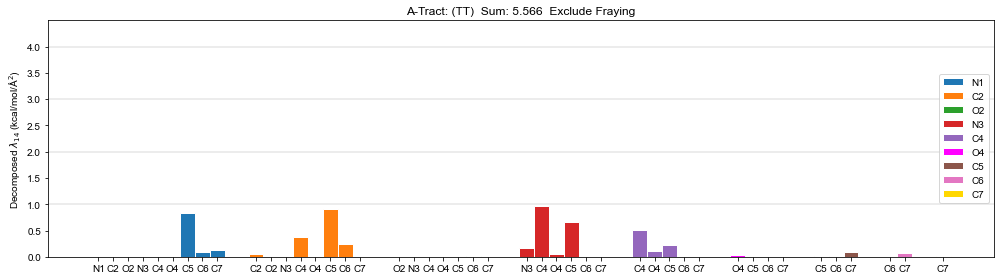

In [9]:
figsize = (14, 4)
bbox_to_anchor = (1.0, 0.5)
ylim = (0.0, 4.498825810865691)
assist_lines = [1,2,3,4]
fig, ax = p_agent.plot_lambda_qTAq_respective_atoms_single_mode(figsize, strandid, mode_id_strand, bbox_to_anchor, ylim, assist_lines)
ax.tick_params(axis='both', labelsize=10)
plt.tight_layout()
png_out = path.join(svg_folder, f'{host}_{strandid}_mode{mode_id}.png')
plt.savefig(png_out, dpi=150)
plt.show()

### Part 3: VMD Drawing

In [4]:
vmddraw_agent.vmd_show_bonds_in_dimer(strandid, mode_id)

vmd -gro /home/yizaochen/codes/dna_rna/all_systems/a_tract_21mer/bdna+bdna/input/allatoms/bdna+bdna.perfect.gro
source /home/yizaochen/codes/dna_rna/enmspring/tclscripts/show_basestack_pair.tcl
/home/yizaochen/Desktop/drawzone_temp/mol_structure/a_tract_21mer_STRAND2_10


### Part 1-2: A-tract-TT

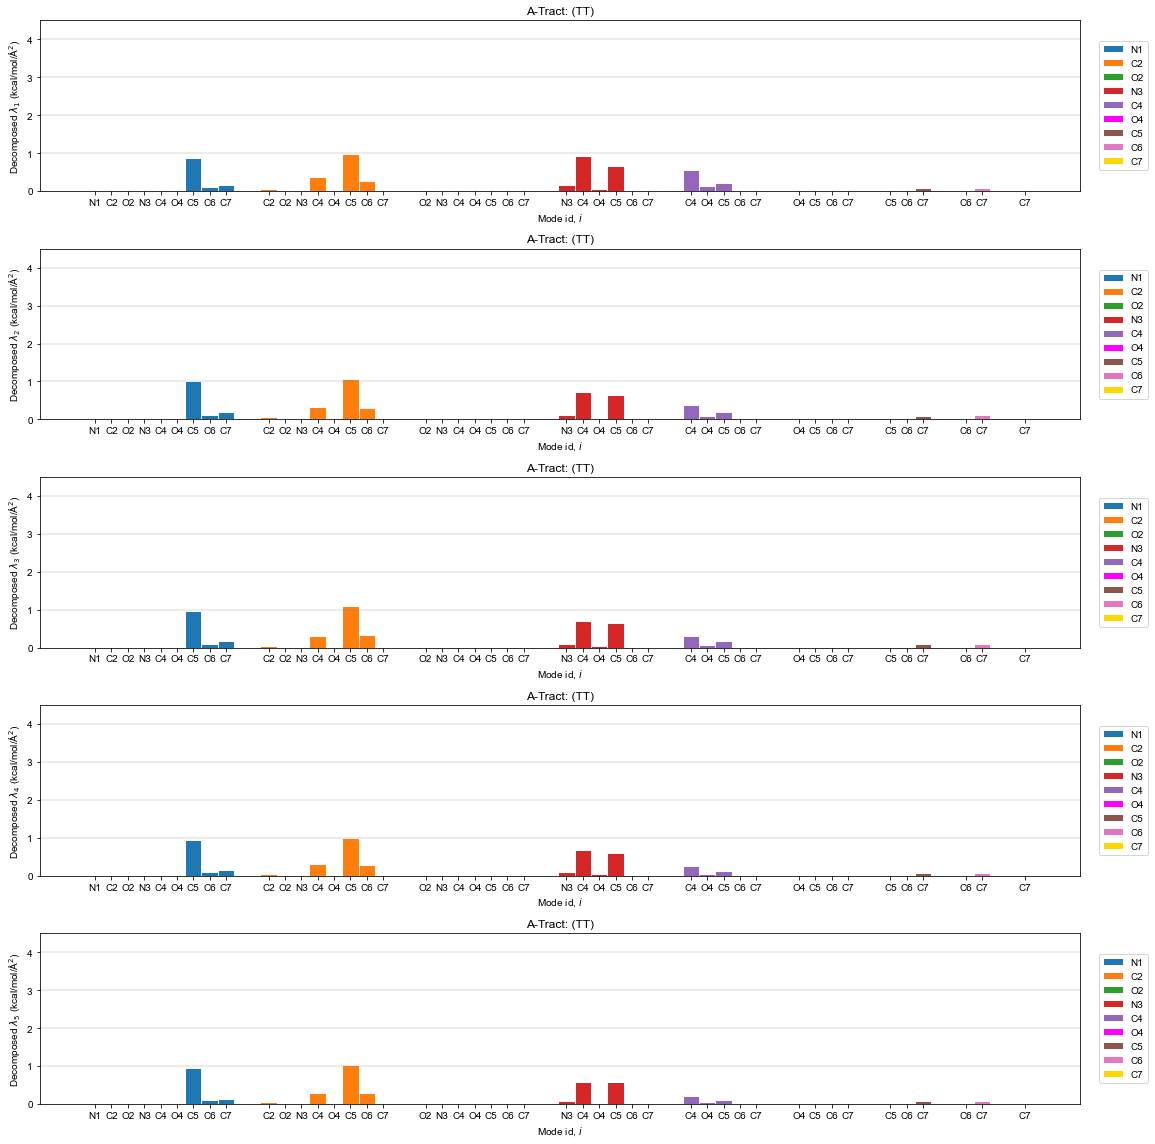

In [5]:
figsize = (16, 16)
strandid = 'STRAND2'
start_mode = 1
end_mode = 5
bbox_to_anchor = (1.07, 0.5)
ylim = (0.0, 4.498825810865691)
assist_lines = [1,2,3,4]
fig, axes = p_agent.plot_lambda_qTAq_respective_atoms_five_modes(figsize, strandid, start_mode, end_mode, bbox_to_anchor, ylim, assist_lines)
plt.tight_layout()
svg_out = path.join(svg_folder, f'{host}_{strandid}_mode{start_mode}_to_mode{end_mode}.svg')
#plt.savefig(svg_out)
plt.show()

In [3]:
vmddraw_agent.vmd_show_a_tract_TT_pair()

vmd -gro /home/yizaochen/codes/dna_rna/all_systems/a_tract_21mer/bdna+bdna/input/allatoms/bdna+bdna.perfect.gro
source /home/yizaochen/codes/dna_rna/enmspring/tclscripts/show_basestack_pair.tcl
/home/yizaochen/Documents/JPCL_ytc_2021/images/atom_importance_1/mol_structure/a_tract_21mer_TT_pair


In [7]:
[1] * 5

[1, 1, 1, 1, 1]

### Part 2-1: G-tract-GG

In [3]:
host = 'g_tract_21mer'
p_agent = PairImportance(host, rootfolder)
vmddraw_agent = BaseStackImportanceAgent(host, rootfolder, svg_folder)

/home/yizaochen/codes/dna_rna/fluctmatch_sequence/g_tract_21mer/bdna+bdna/pd_dfs exists
Read Dataframe of stacking: df_st
Thare are 399 nodes.
Initialize adjacency, degree and Laplacian matrices... Done.
Finish the setup for Laplaican matrix.
Total number of nodes: 399
There are 231 eigenvectors belonging to STRAND1.
There are 168 eigenvectors belonging to STRAND2.
Sum of two strands: 399
/home/yizaochen/codes/dna_rna/fluctmatch_sequence/g_tract_21mer/bdna+bdna/pd_dfs exists
Read Dataframe of stacking: df_st
Thare are 399 nodes.
Initialize adjacency, degree and Laplacian matrices... Done.
Finish the setup for Laplaican matrix.
Total number of nodes: 399
There are 231 eigenvectors belonging to STRAND1.
There are 168 eigenvectors belonging to STRAND2.
Sum of two strands: 399
/home/yizaochen/Documents/JPCL_ytc_2021/images/atom_importance_1/mol_structure exists


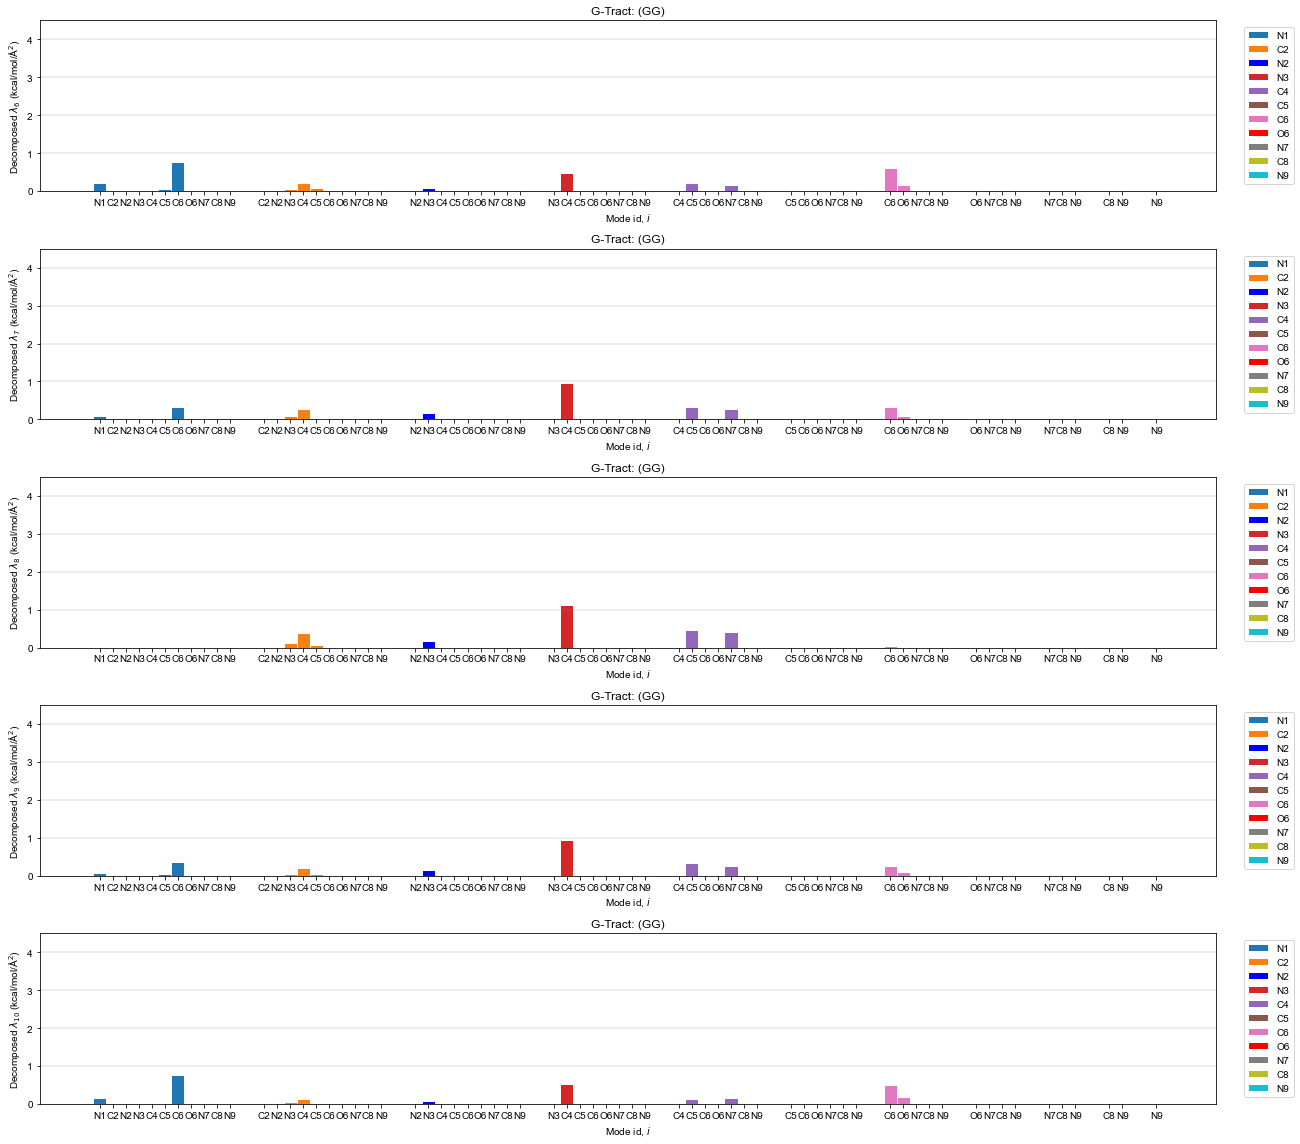

In [11]:
figsize = (18, 16)
strandid = 'STRAND1'
start_mode = 6
end_mode = 10
bbox_to_anchor = (1.07, 0.5)
ylim = (0.0, 4.498825810865691)
assist_lines = [1,2,3,4]
fig, axes = p_agent.plot_lambda_qTAq_respective_atoms_five_modes(figsize, strandid, start_mode, end_mode, bbox_to_anchor, ylim, assist_lines)
plt.tight_layout()
svg_out = path.join(svg_folder, f'{host}_{strandid}_mode{start_mode}_to_mode{end_mode}.svg')
plt.savefig(svg_out)
plt.show()

In [3]:
vmddraw_agent.vmd_show_g_tract_GG_pair()

vmd -gro /home/yizaochen/codes/dna_rna/all_systems/g_tract_21mer/bdna+bdna/input/allatoms/bdna+bdna.perfect.gro
('N1', 'C6')
('C6', 'C6')
('N3', 'C4')
('N1', 'N1')
('C2', 'C4')
('C4', 'C5')
('C4', 'N7')
source /home/yizaochen/codes/dna_rna/enmspring/tclscripts/show_basestack_pair.tcl
/home/yizaochen/Documents/JPCL_ytc_2021/images/atom_importance_1/mol_structure/g_tract_21mer_AA_pair1


### Part 2-2: G-tract-CC

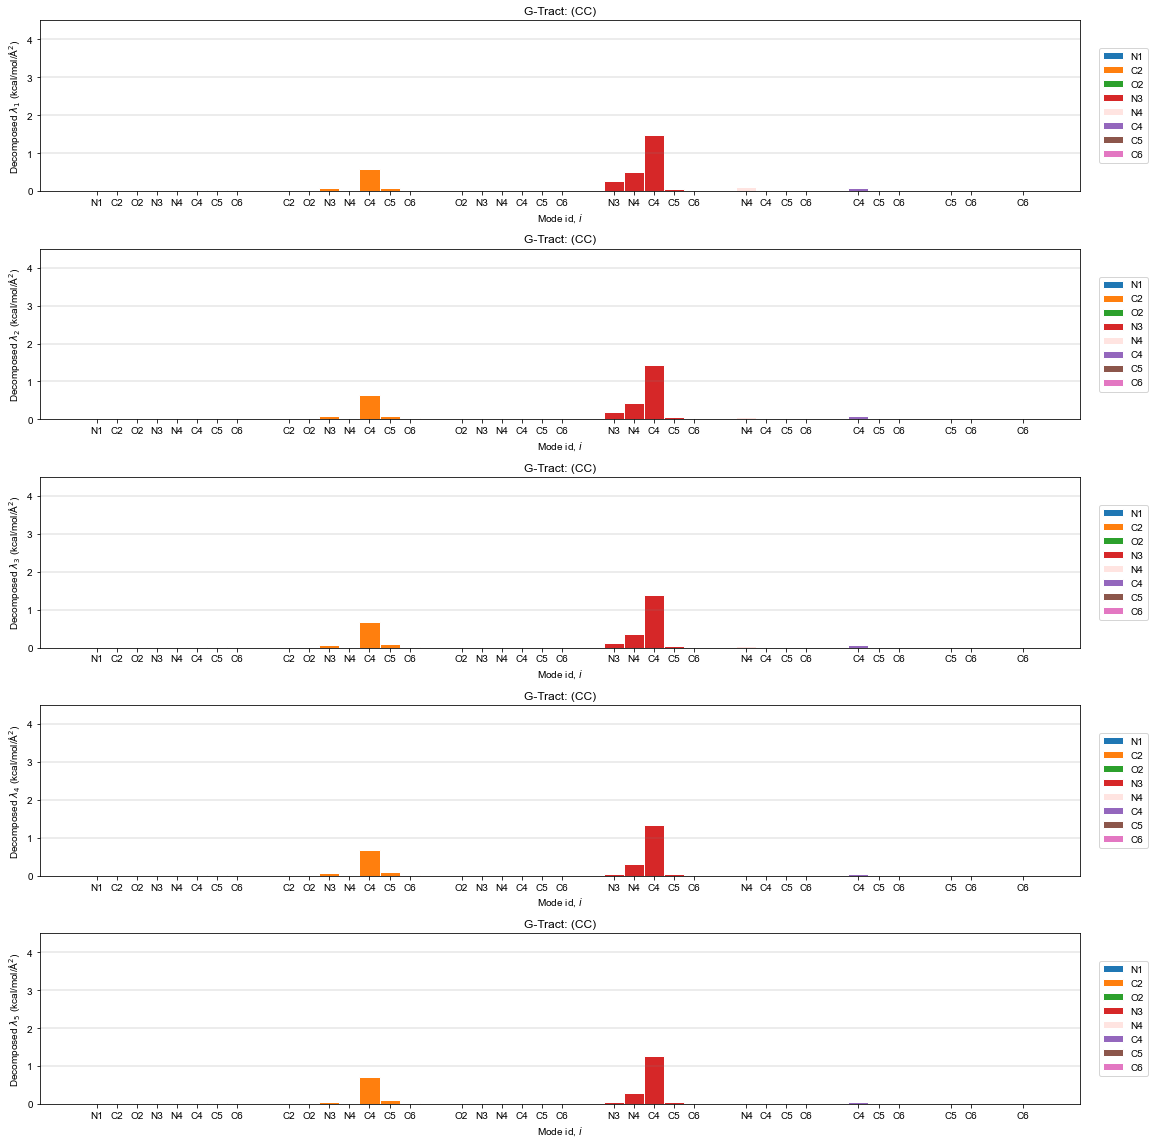

In [8]:
figsize = (16, 16)
strandid = 'STRAND2'
start_mode = 1
end_mode = 5
bbox_to_anchor = (1.07, 0.5)
ylim = (0.0, 4.498825810865691)
assist_lines = [1,2,3,4]
fig, axes = p_agent.plot_lambda_qTAq_respective_atoms_five_modes(figsize, strandid, start_mode, end_mode, bbox_to_anchor, ylim, assist_lines)
plt.tight_layout()
svg_out = path.join(svg_folder, f'{host}_{strandid}_mode{start_mode}_to_mode{end_mode}.svg')
#plt.savefig(svg_out)
plt.show()

In [4]:
vmddraw_agent.vmd_show_g_tract_CC_pair()

vmd -gro /home/yizaochen/codes/dna_rna/all_systems/g_tract_21mer/bdna+bdna/input/allatoms/bdna+bdna.perfect.gro
source /home/yizaochen/codes/dna_rna/enmspring/tclscripts/show_basestack_pair.tcl
/home/yizaochen/Documents/JPCL_ytc_2021/images/atom_importance_1/mol_structure/g_tract_21mer_TT_pair


### Part 3: ATAT

In [2]:
host = 'atat_21mer'
p_agent = PairImportance(host, rootfolder)
vmddraw_agent = BaseStackImportanceAgent(host, rootfolder, svg_folder)

/home/yizaochen/codes/dna_rna/fluctmatch_sequence/atat_21mer/bdna+bdna/pd_dfs exists
Read Dataframe of stacking: df_st
Thare are 399 nodes.
Initialize adjacency, degree and Laplacian matrices... Done.
Finish the setup for Laplaican matrix.
Total number of nodes: 399
There are 200 eigenvectors belonging to STRAND1.
There are 199 eigenvectors belonging to STRAND2.
Sum of two strands: 399
/home/yizaochen/codes/dna_rna/fluctmatch_sequence/atat_21mer/bdna+bdna/pd_dfs exists
Read Dataframe of stacking: df_st
Thare are 399 nodes.
Initialize adjacency, degree and Laplacian matrices... Done.
Finish the setup for Laplaican matrix.
Total number of nodes: 399
There are 200 eigenvectors belonging to STRAND1.
There are 199 eigenvectors belonging to STRAND2.
Sum of two strands: 399
/home/yizaochen/Documents/JPCL_ytc_2021/images/atom_importance_1/mol_structure exists


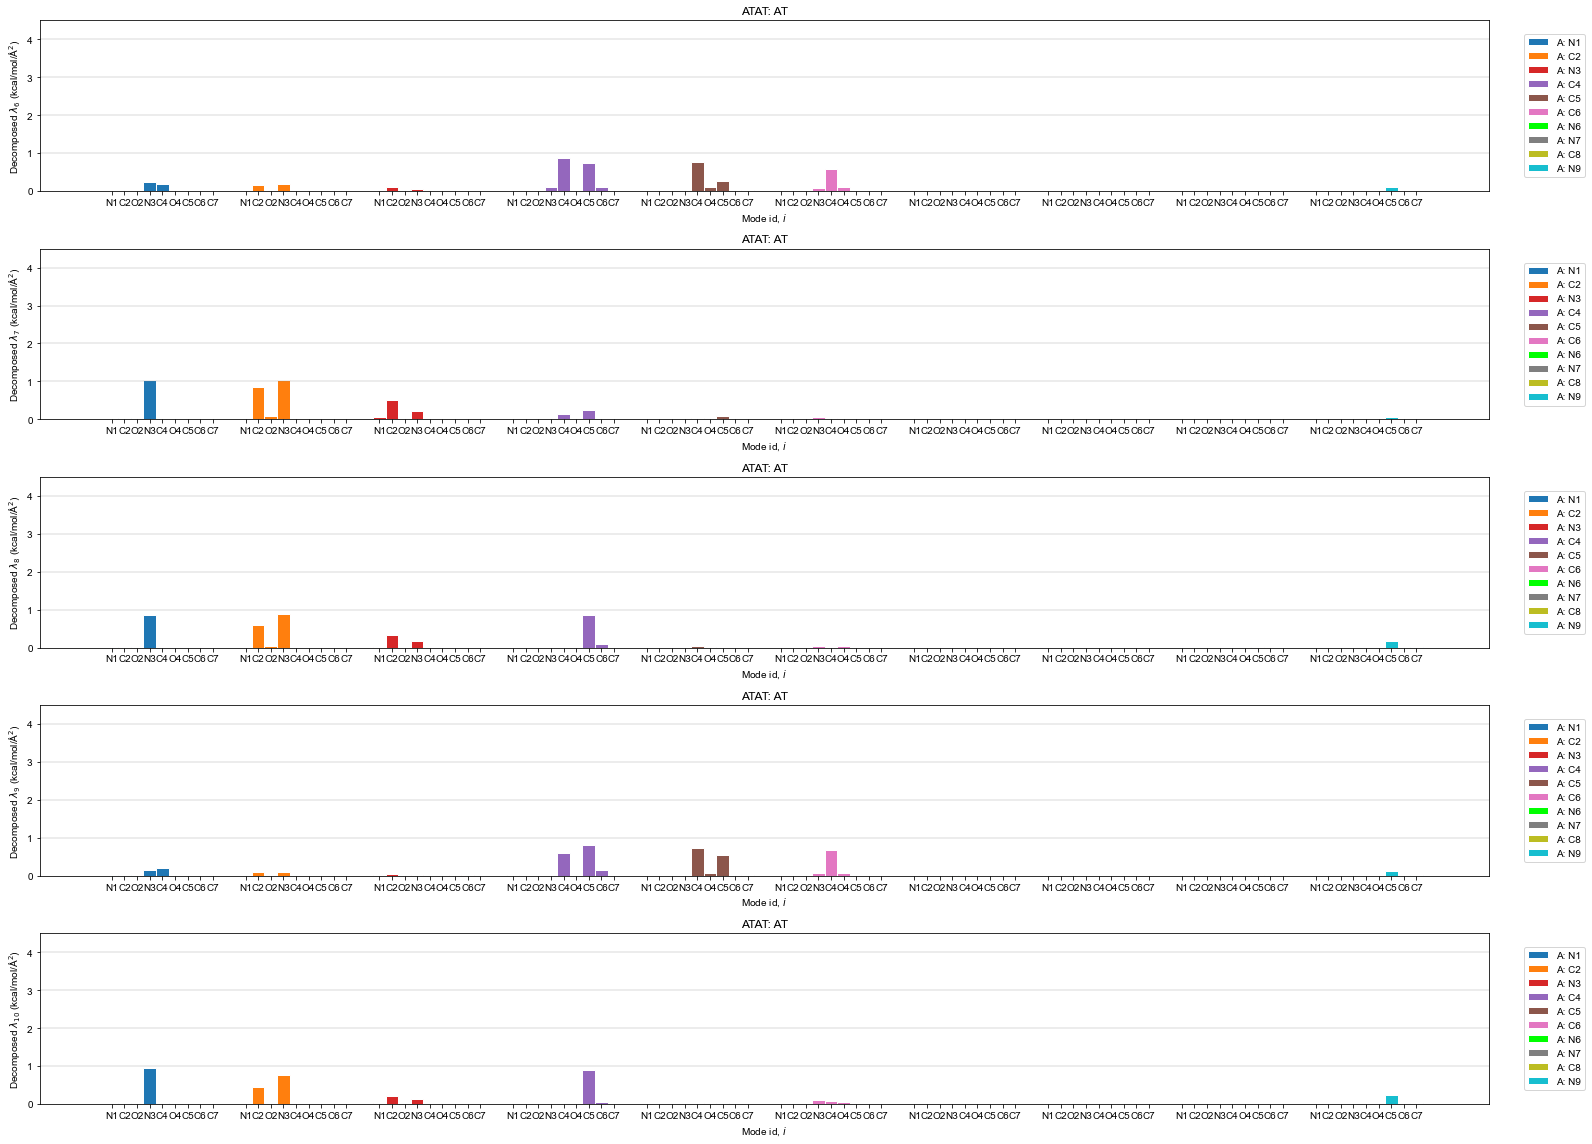

In [12]:
figsize = (22, 16)
strandid = 'STRAND2'
resname_i = 'A'
resname_j = 'T'
start_mode = 6
end_mode = 10
bbox_to_anchor = (1.07, 0.5)
ylim = (0.0, 4.498825810865691)
assist_lines = [1,2,3,4]
fig, axes = p_agent.plot_lambda_qTAq_respective_atoms_five_modes_by_resnames(figsize, strandid, resname_i, resname_j, 
                                                                             start_mode, end_mode, bbox_to_anchor, ylim, assist_lines)
plt.tight_layout()
svg_out = path.join(svg_folder, f'{host}_{strandid}_mode{start_mode}_to_mode{end_mode}_{resname_i}{resname_j}.svg')
plt.savefig(svg_out)
plt.show()

In [5]:
vmddraw_agent.vmd_show_ATAT_AT_pair1()

vmd -gro /home/yizaochen/codes/dna_rna/all_systems/atat_21mer/bdna+bdna/input/allatoms/bdna+bdna.perfect.gro
source /home/yizaochen/codes/dna_rna/enmspring/tclscripts/show_basestack_pair.tcl
/home/yizaochen/Documents/JPCL_ytc_2021/images/atom_importance_1/mol_structure/atat_21mer_AT_pair1


In [3]:
vmddraw_agent.vmd_show_ATAT_AT_pair2()

vmd -gro /home/yizaochen/codes/dna_rna/all_systems/atat_21mer/bdna+bdna/input/allatoms/bdna+bdna.perfect.gro
source /home/yizaochen/codes/dna_rna/enmspring/tclscripts/show_basestack_pair.tcl
/home/yizaochen/Documents/JPCL_ytc_2021/images/atom_importance_1/mol_structure/atat_21mer_AT_pair2


### Part 4: GCGC

In [2]:
host = 'gcgc_21mer'
p_agent = PairImportance(host, rootfolder)
vmddraw_agent = BaseStackImportanceAgent(host, rootfolder, svg_folder)

/home/yizaochen/codes/dna_rna/fluctmatch_sequence/gcgc_21mer/bdna+bdna/pd_dfs exists
Read Dataframe of stacking: df_st
Thare are 399 nodes.
Initialize adjacency, degree and Laplacian matrices... Done.
Finish the setup for Laplaican matrix.
Total number of nodes: 399
There are 201 eigenvectors belonging to STRAND1.
There are 198 eigenvectors belonging to STRAND2.
Sum of two strands: 399
/home/yizaochen/codes/dna_rna/fluctmatch_sequence/gcgc_21mer/bdna+bdna/pd_dfs exists
Read Dataframe of stacking: df_st
Thare are 399 nodes.
Initialize adjacency, degree and Laplacian matrices... Done.
Finish the setup for Laplaican matrix.
Total number of nodes: 399
There are 201 eigenvectors belonging to STRAND1.
There are 198 eigenvectors belonging to STRAND2.
Sum of two strands: 399
/home/yizaochen/Documents/JPCL_ytc_2021/images/atom_importance_1/mol_structure exists


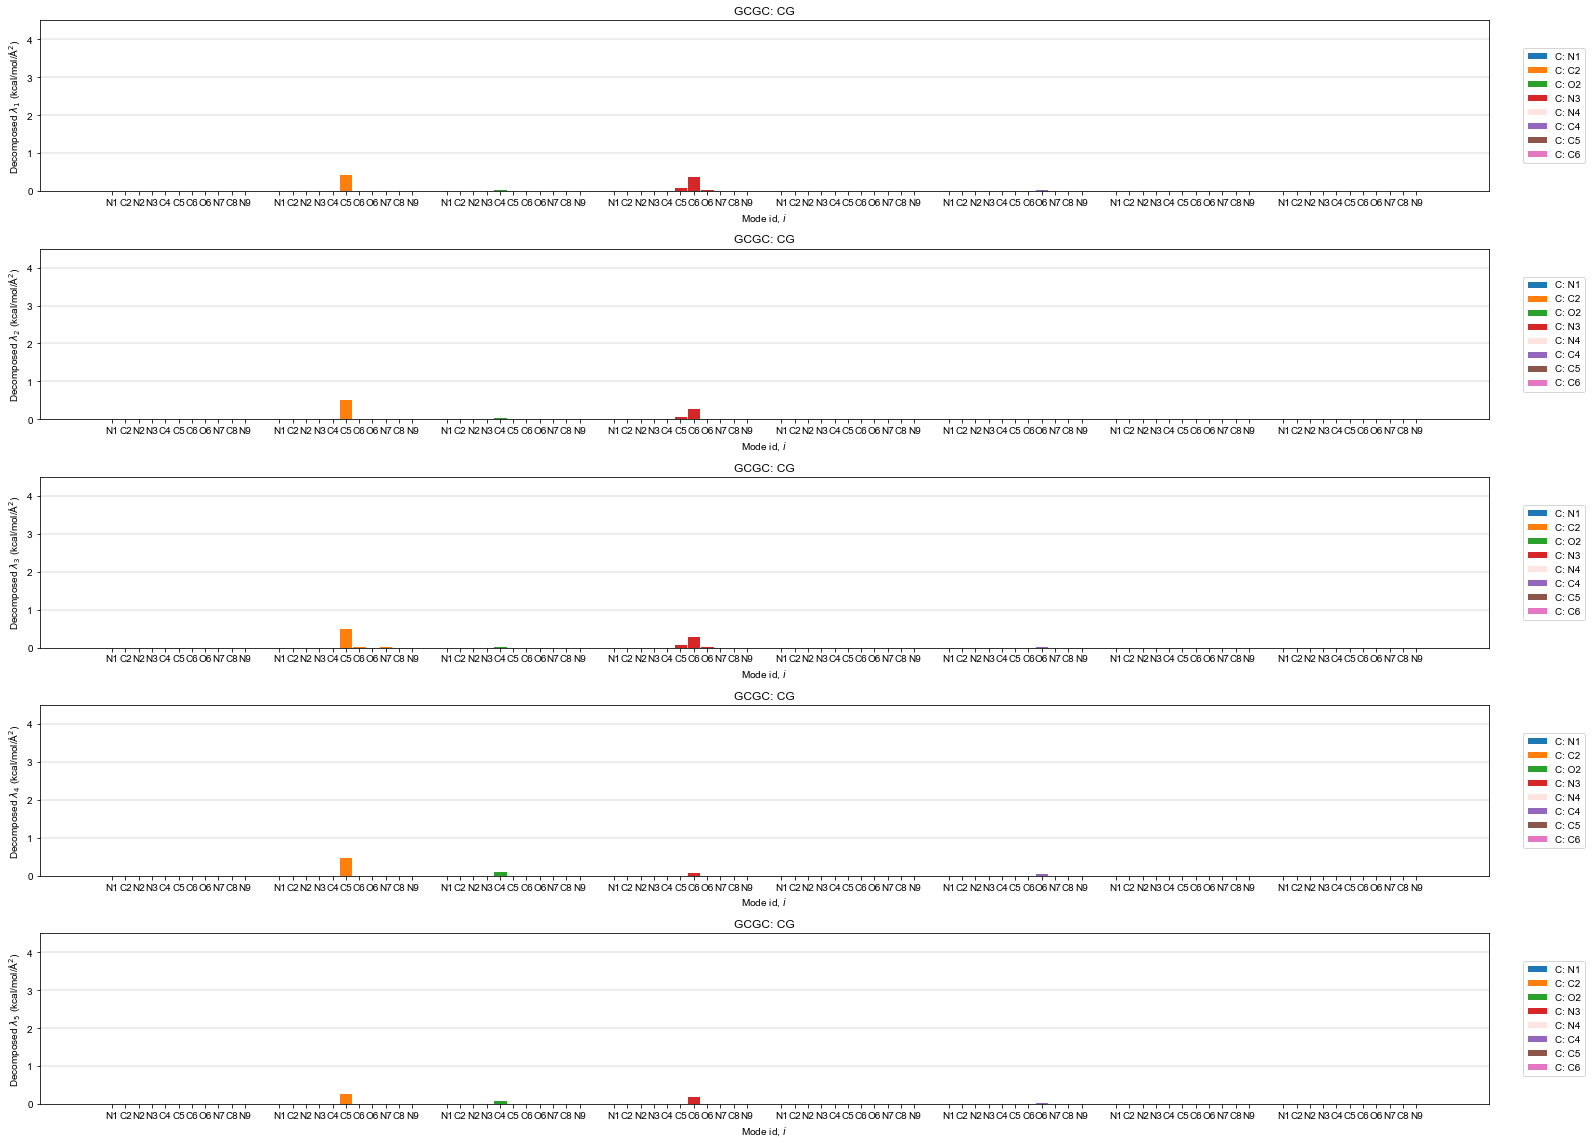

In [5]:
figsize = (22, 16)
strandid = 'STRAND1'
resname_i = 'G'
resname_j = 'C'
start_mode = 1
end_mode = 5
bbox_to_anchor = (1.07, 0.5)
ylim = (0.0, 4.498825810865691)
assist_lines = [1,2,3,4]
fig, axes = p_agent.plot_lambda_qTAq_respective_atoms_five_modes_by_resnames(figsize, strandid, resname_i, resname_j, 
                                                                             start_mode, end_mode, bbox_to_anchor, ylim, assist_lines)
plt.tight_layout()
svg_out = path.join(svg_folder, f'{host}_{strandid}_mode{start_mode}_to_mode{end_mode}_{resname_i}{resname_j}.svg')
plt.savefig(svg_out)
plt.show()

In [3]:
vmddraw_agent.vmd_show_GCGC_GC_pair()

vmd -gro /home/yizaochen/codes/dna_rna/all_systems/gcgc_21mer/bdna+bdna/input/allatoms/bdna+bdna.perfect.gro
source /home/yizaochen/codes/dna_rna/enmspring/tclscripts/show_basestack_pair.tcl
/home/yizaochen/Documents/JPCL_ytc_2021/images/atom_importance_1/mol_structure/gcgc_21mer_AT_pair


### Part 5: CTCT

In [2]:
host = 'ctct_21mer'
p_agent = PairImportance(host, rootfolder)
vmddraw_agent = BaseStackImportanceAgent(host, rootfolder, svg_folder)

/home/yizaochen/codes/dna_rna/fluctmatch_sequence/ctct_21mer/bdna+bdna/pd_dfs exists
Read Dataframe of stacking: df_st
Thare are 399 nodes.
Initialize adjacency, degree and Laplacian matrices... Done.
Finish the setup for Laplaican matrix.
Total number of nodes: 399
There are 178 eigenvectors belonging to STRAND1.
There are 221 eigenvectors belonging to STRAND2.
Sum of two strands: 399
/home/yizaochen/codes/dna_rna/fluctmatch_sequence/ctct_21mer/bdna+bdna/pd_dfs exists
Read Dataframe of stacking: df_st
Thare are 399 nodes.
Initialize adjacency, degree and Laplacian matrices... Done.
Finish the setup for Laplaican matrix.
Total number of nodes: 399
There are 178 eigenvectors belonging to STRAND1.
There are 221 eigenvectors belonging to STRAND2.
Sum of two strands: 399
/home/yizaochen/Documents/JPCL_ytc_2021/images/atom_importance_1/mol_structure exists


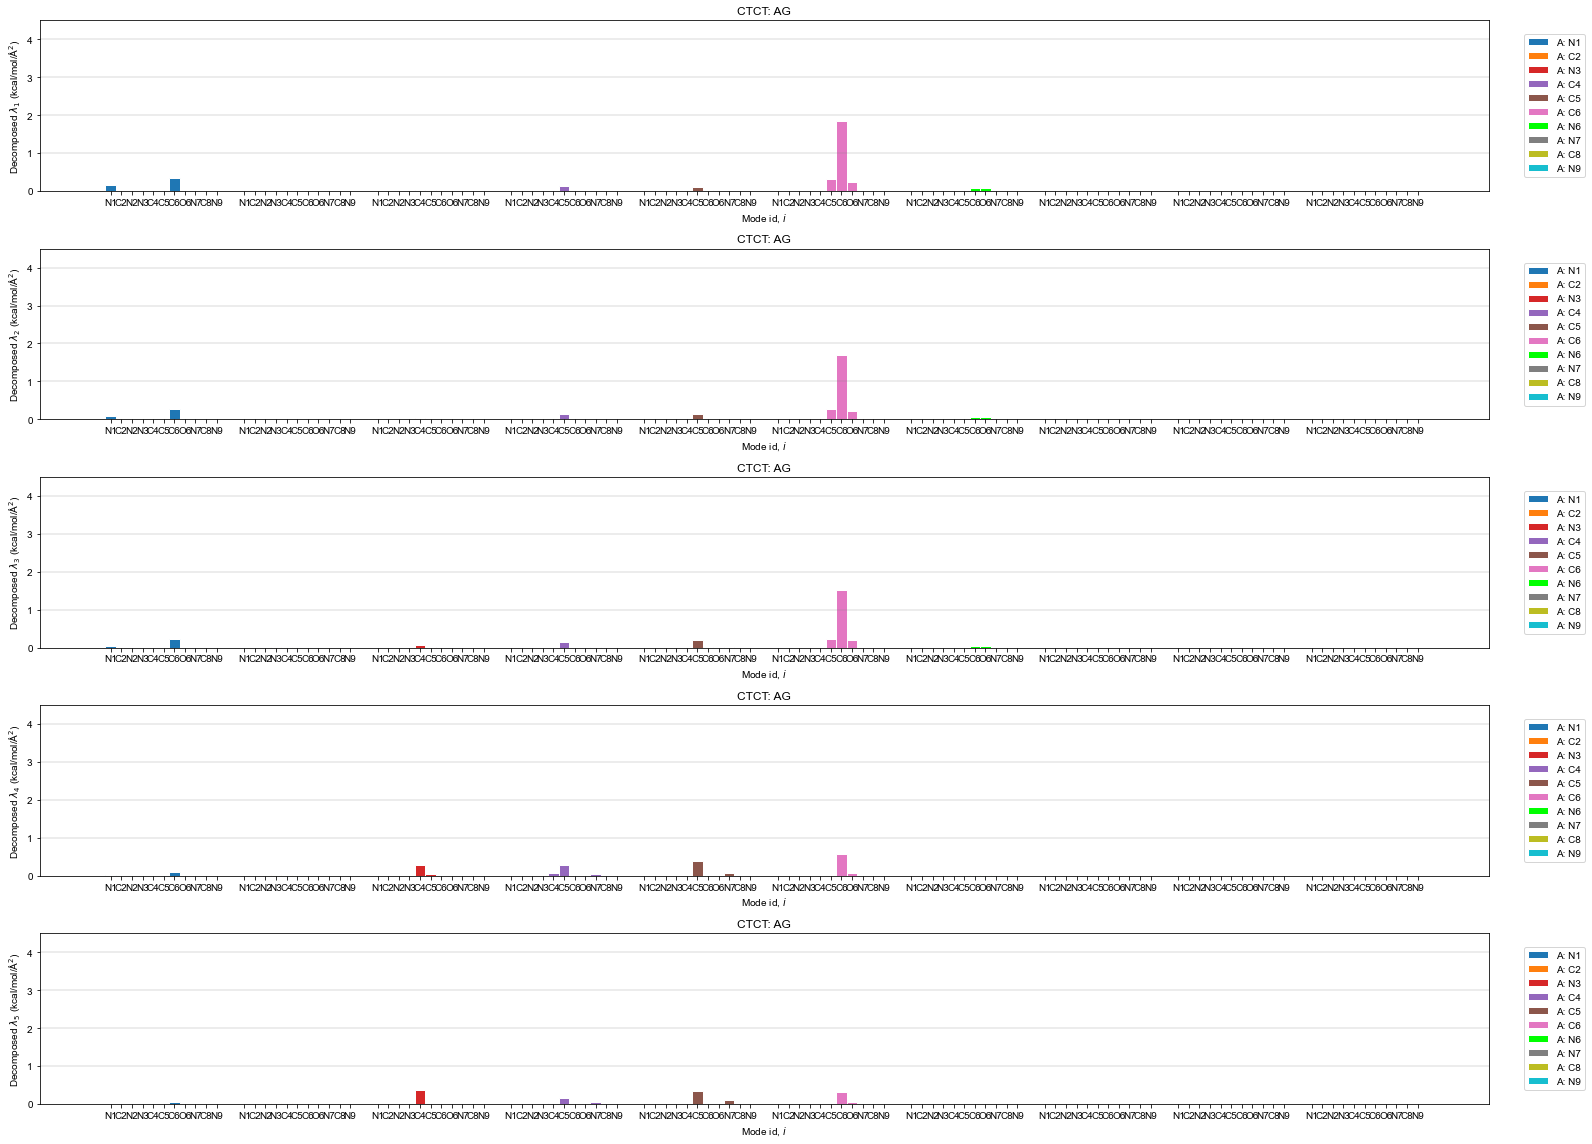

In [5]:
figsize = (22, 16)
strandid = 'STRAND2'
resname_i = 'A'
resname_j = 'G'
start_mode = 1
end_mode = 5
bbox_to_anchor = (1.07, 0.5)
ylim = (0.0, 4.498825810865691)
assist_lines = [1,2,3,4]
fig, axes = p_agent.plot_lambda_qTAq_respective_atoms_five_modes_by_resnames(figsize, strandid, resname_i, resname_j, 
                                                                             start_mode, end_mode, bbox_to_anchor, ylim, assist_lines)
plt.tight_layout()
svg_out = path.join(svg_folder, f'{host}_{strandid}_mode{start_mode}_to_mode{end_mode}_{resname_i}{resname_j}.svg')
plt.savefig(svg_out)
plt.show()

In [3]:
vmddraw_agent.vmd_show_CTCT_CT_pair()

vmd -gro /home/yizaochen/codes/dna_rna/all_systems/ctct_21mer/bdna+bdna/input/allatoms/bdna+bdna.perfect.gro
source /home/yizaochen/codes/dna_rna/enmspring/tclscripts/show_basestack_pair.tcl
/home/yizaochen/Documents/JPCL_ytc_2021/images/atom_importance_1/mol_structure/ctct_21mer_CT_pair


In [3]:
vmddraw_agent.vmd_show_CTCT_GA_pair1()

vmd -gro /home/yizaochen/codes/dna_rna/all_systems/ctct_21mer/bdna+bdna/input/allatoms/bdna+bdna.perfect.gro
source /home/yizaochen/codes/dna_rna/enmspring/tclscripts/show_basestack_pair.tcl
/home/yizaochen/Documents/JPCL_ytc_2021/images/atom_importance_1/mol_structure/ctct_21mer_GA_pair1


In [4]:
vmddraw_agent.vmd_show_CTCT_GA_pair2()

vmd -gro /home/yizaochen/codes/dna_rna/all_systems/ctct_21mer/bdna+bdna/input/allatoms/bdna+bdna.perfect.gro
source /home/yizaochen/codes/dna_rna/enmspring/tclscripts/show_basestack_pair.tcl
/home/yizaochen/Documents/JPCL_ytc_2021/images/atom_importance_1/mol_structure/ctct_21mer_GA_pair2


### Part 6: TGTG

In [2]:
host = 'tgtg_21mer'
p_agent = PairImportance(host, rootfolder)
vmddraw_agent = BaseStackImportanceAgent(host, rootfolder, svg_folder)

/home/yizaochen/codes/dna_rna/fluctmatch_sequence/tgtg_21mer/bdna+bdna/pd_dfs exists
Read Dataframe of stacking: df_st
Thare are 399 nodes.
Initialize adjacency, degree and Laplacian matrices... Done.
Finish the setup for Laplaican matrix.
Total number of nodes: 399
There are 210 eigenvectors belonging to STRAND1.
There are 189 eigenvectors belonging to STRAND2.
Sum of two strands: 399
/home/yizaochen/codes/dna_rna/fluctmatch_sequence/tgtg_21mer/bdna+bdna/pd_dfs exists
Read Dataframe of stacking: df_st
Thare are 399 nodes.
Initialize adjacency, degree and Laplacian matrices... Done.
Finish the setup for Laplaican matrix.
Total number of nodes: 399
There are 210 eigenvectors belonging to STRAND1.
There are 189 eigenvectors belonging to STRAND2.
Sum of two strands: 399
/home/yizaochen/Documents/JPCL_ytc_2021/images/atom_importance_1/mol_structure exists


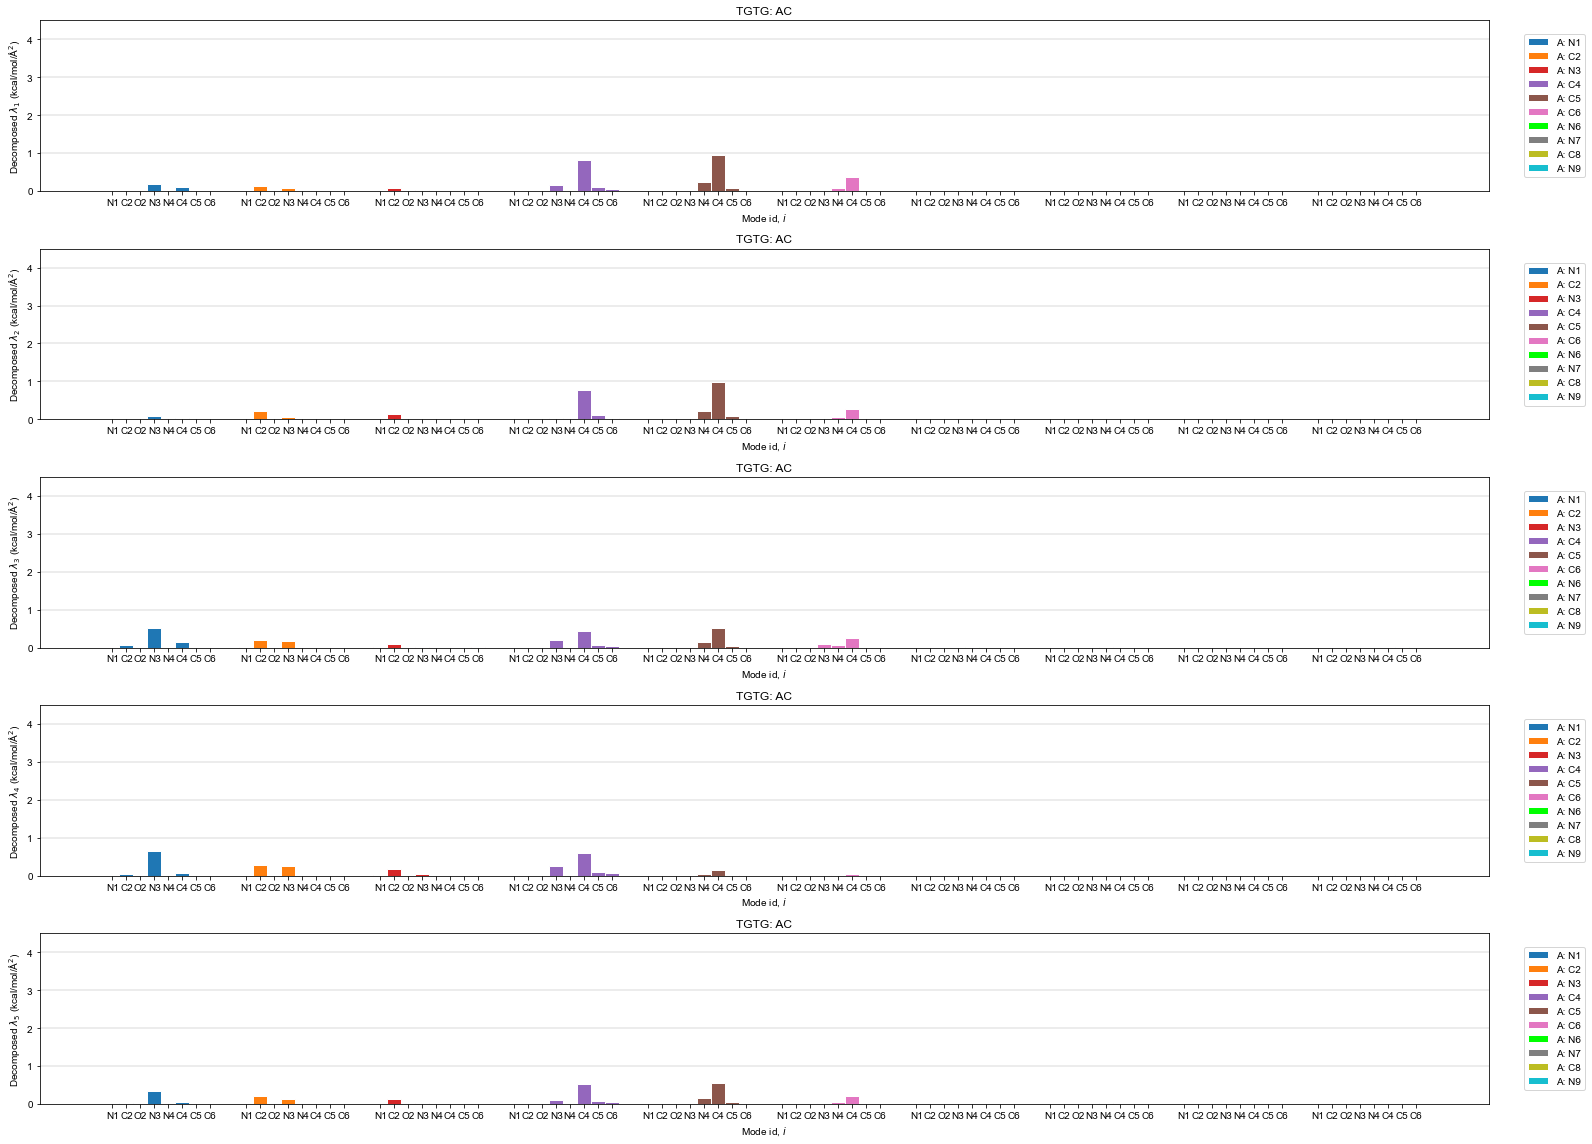

In [33]:
figsize = (22, 16)
strandid = 'STRAND2'
resname_i = 'A'
resname_j = 'C'
start_mode = 1
end_mode = 5
bbox_to_anchor = (1.07, 0.5)
ylim = (0.0, 4.498825810865691)
assist_lines = [1,2,3,4]
fig, axes = p_agent.plot_lambda_qTAq_respective_atoms_five_modes_by_resnames(figsize, strandid, resname_i, resname_j, 
                                                                             start_mode, end_mode, bbox_to_anchor, ylim, assist_lines)
plt.tight_layout()
svg_out = path.join(svg_folder, f'{host}_{strandid}_mode{start_mode}_to_mode{end_mode}_{resname_i}{resname_j}.svg')
plt.savefig(svg_out)
plt.show()

In [4]:
vmddraw_agent.vmd_show_TGTG_GT_pair()

vmd -gro /home/yizaochen/codes/dna_rna/all_systems/tgtg_21mer/bdna+bdna/input/allatoms/bdna+bdna.perfect.gro
source /home/yizaochen/codes/dna_rna/enmspring/tclscripts/show_basestack_pair.tcl
/home/yizaochen/Documents/JPCL_ytc_2021/images/atom_importance_1/mol_structure/tgtg_21mer_GT_pair


In [3]:
vmddraw_agent.vmd_show_TGTG_AC_pair()

vmd -gro /home/yizaochen/codes/dna_rna/all_systems/tgtg_21mer/bdna+bdna/input/allatoms/bdna+bdna.perfect.gro
source /home/yizaochen/codes/dna_rna/enmspring/tclscripts/show_basestack_pair.tcl
/home/yizaochen/Documents/JPCL_ytc_2021/images/atom_importance_1/mol_structure/tgtg_21mer_AC_pair


### Addtional Part 1: VMD Draw

In [3]:
host = 'a_tract_21mer'
vmddraw_agent = BaseStackImportanceAgent(host, rootfolder, svg_folder)

/home/yizaochen/codes/dna_rna/fluctmatch_sequence/a_tract_21mer/bdna+bdna/pd_dfs exists
Read Dataframe of stacking: df_st
Thare are 399 nodes.
Initialize adjacency, degree and Laplacian matrices... Done.
Finish the setup for Laplaican matrix.
Total number of nodes: 399
There are 210 eigenvectors belonging to STRAND1.
There are 189 eigenvectors belonging to STRAND2.
Sum of two strands: 399
/home/yizaochen/Documents/JPCL_ytc_2021/images/atom_importance_1/mol_structure exists


In [5]:
atomname_i = 'N1'
atomname_j = 'C6'
strandid = 'STRAND1'
vmddraw_agent.vmd_show_pair_example(atomname_i, atomname_j, strandid)

vmd -cor /home/yizaochen/codes/dna_rna/fluctmatch_sequence/a_tract_21mer/bdna+bdna/input/bdna+bdna.nohydrogen.crd
source /home/yizaochen/codes/dna_rna/enmspring/tclscripts/illustrate_pairimportance.tcl
